In [1]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from PIL import Image
import numpy as np
import cv2

import keras.backend as K
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
keras_sess = K.set_session(sess)

/libs/base/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Init function
## Define various utility functions

def pre_process_image(path):
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    ### actually returns h, w
    h, w = img.shape

    ### if height less than 32
    if h < 32:
        add_zeros = np.ones((32-h, w)) * 255
        img = np.concatenate((img, add_zeros))
        h = 32

    ## if width less than 128
    if w < 128:
        add_zeros = np.ones((h, 128-w)) * 255
        img = np.concatenate((img, add_zeros), axis=1)
        w = 128

    ### if width is greater than 128 or height greater than 32
    if w > 128 or h > 32:
        img = cv2.resize(img, (128, 32))

    
    img = np.expand_dims(img , axis = 2)

    # Normalize each image
    img = img / 255.
    
    return img

In [3]:
def predict_text(images):
    '''
    crnn model prediction
    '''
    # predict outputs on validation images
    
    predictions = model_tr.predict(np.array(images), batch_size=512, verbose=1)
    
    # use CTC decoder
    out = K.get_value(K.ctc_decode(predictions, 
                                   input_length=np.ones(predictions.shape[0]) * predictions.shape[1],
                                   greedy=True)[0][0])
    
    texts = []

    for x in out:

        ans = ""
        for p in x:
            if int(p) != -1:
                ans += char_list[int(p)]

        texts.append(ans)
    
    return texts


vocab =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
        ':', ';', '<', '=', '>', '?', '@', 
        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '\\', ']', '_', '`', 
        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

char_list = sorted(vocab)

In [4]:
model_tr = load_model("models/mjsynth_best_model.h5")

/libs/project/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


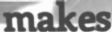

In [5]:
Image.open("test_images/1_makes_46197.jpg")

In [6]:
predict_text([pre_process_image("test_images/1_makes_46197.jpg")])[0]

1/1 [==============================] - 2s 2s/step


'makes'

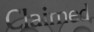

In [7]:
Image.open("test_images/3_Claimed_13849.jpg")

In [8]:
predict_text([pre_process_image("test_images/3_Claimed_13849.jpg")])[0]

1/1 [==============================] - 0s 5ms/step


'Claimed'